# Loan default Detection 

We will be investigating a data set from a bank that has customer information such as 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt','Other Debt','Address', 'DebtIncomeRatio'. An additional feature in the data set is "Defaulted" which is our target data. If Defaulted is equal to 0 it means that the customer has paid back the loan and if it is equal to 1 it means that the customer has defaulted on the loan. 

Many customers are still paying back their loans and we will be predicting whether they will default or not based on the customer information using a suitable classification model. 

The used data set is publicly available and can be downloaded via:
https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

## 1- Loading the Data

In [28]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns 
import numpy as np

In [29]:
df = pd.read_csv("C:/Users/eliec/Downloads/customer_segmentation.csv")
#Data source shorturl.at/dhFW7

In [30]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 100
print(df.shape)
df.head()

(850, 10)


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


our target variable "Defaulted" has 150 entries missing out of 850 which are the entries that we need to predict. We will first split the complete data that has all the entries (700) into test and train data to be able to identify the best classification model to use. Onece we have identified the best model we will proceed to predicting the outcome of the loans that are still outstanding.

## 2- Data Wrangling

In [32]:
# Slicing the data where teh feature "Defaulted" is missing. This represents the oustanding loans
df_missing = df[df["Defaulted"].isnull()]
df_missing.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
11,12,34,2,9,40,0.374,0.266,NaN,NBA003,1.6
13,14,46,1,6,30,1.415,3.865,NaN,NBA019,17.6
15,16,24,1,1,16,0.185,1.287,NaN,NBA005,9.2


In [33]:
# dropping the rows with missing "Defaulted" from the dataframe

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          700 non-null    object 
 9   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 60.2+ KB


## 3- Feature Analysis

In [56]:
print(len(df["Address"].unique()))
print(len(df["Customer Id"].unique()))

31
700


The feature "Address" has 31 unique values eventhough we have 700 different customers which means that the addresse represent neighborhoods or cities. Sometime neighborhood have a strong correlation to socio-economic factors that might have an effect on our target values. We will investigate that correlation but first we need to cast the Adresses from object to numbers

In [57]:
df["Address"] = df["Address"].astype('category')
df["Address_code"] = df["Address"].cat.codes

In [58]:
# checking the correlation between the features and our target variable

df.corr()["Defaulted"].abs().sort_values(ascending=False)

Defaulted          1.000000
DebtIncomeRatio    0.389575
Years Employed     0.282978
Card Debt          0.244734
Address_code       0.164832
Other Debt         0.145716
Age                0.137657
Edu                0.114676
Income             0.070970
Customer Id        0.004244
Name: Defaulted, dtype: float64

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Address_code
Customer Id,1.000000,0.014894,0.039896,0.034290,0.050366,0.018939,0.031602,0.004244,0.002401,0.057768
Age,0.014894,1.000000,0.022325,0.536497,0.478710,0.295214,0.340213,0.137657,0.016398,0.597081
Edu,0.039896,0.022325,1.000000,0.153621,0.235190,0.088277,0.165458,0.114676,0.008838,0.057163
Years Employed,0.034290,0.536497,0.153621,1.000000,0.619681,0.403698,0.406089,0.282978,0.031182,0.322342
Income,0.050366,0.478710,0.235190,0.619681,1.000000,0.570196,0.610663,0.070970,0.026777,0.316326
Card Debt,0.018939,0.295214,0.088277,0.403698,0.570196,1.000000,0.633108,0.244734,0.501772,0.208779
Other Debt,0.031602,0.340213,0.165458,0.406089,0.610663,0.633108,1.000000,0.145716,0.584867,0.227462
Defaulted,0.004244,0.137657,0.114676,0.282978,0.070970,0.244734,0.145716,1.000000,0.389575,0.164832
DebtIncomeRatio,0.002401,0.016398,0.008838,0.031182,0.026777,0.501772,0.584867,0.389575,1.000000,0.012248
Address_code,0.057768,0.597081,0.057163,0.322342,0.316326,0.208779,0.227462,0.164832,0.012248,1.000000


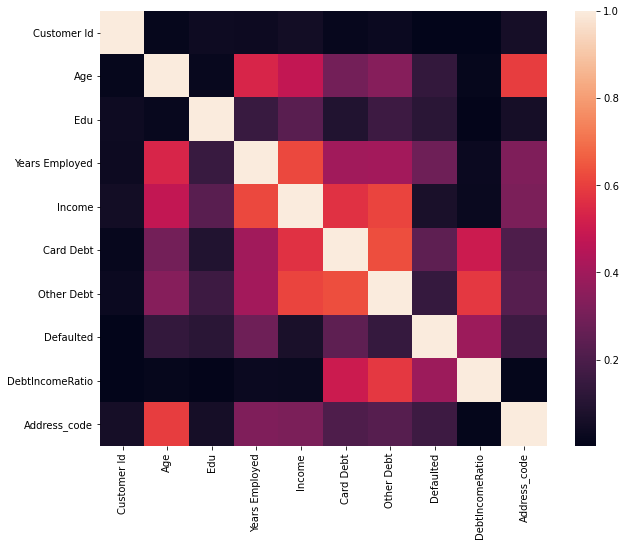

In [44]:
# checking the correlation between all features

fig = plt.figure(figsize=(10,8))
corr = df.corr().abs()
sns.heatmap(corr)
df.corr().abs()

We can see that many features are correlated to one another especially Age and Years Employed so we will not include Age since it is already reflected by YearsEmployed. We will not include Income in the feature selection as it has a low correlation with our target and is represented by a more important feature which is DebtIncomeRatio which has the highest correlation with our target.

The address_code has a weak correlation with our target value but also has high correlation with other features such as Age, Income and Debt so we will not include it in the feature selection 

## 4- Model Deployment and Evaluation 

We will evaluate the following models and choose the one with the highest accuracy

- Decision Tree
- Random Forest
- Logistic Regression
- Support Vector Machine
- K Nearest Neighbors
- Gradient Boosting 

#### Splitting and preprocessing the data

In [59]:
# splitting the data into test and train 

from sklearn.model_selection import train_test_split
X = df[['Edu', 'Years Employed', 'Card Debt','Other Debt', 'DebtIncomeRatio']]
y = df["Defaulted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

Logistic Regression, SVM and KNN require feature standaization so we will do that for all the models

In [60]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### Deploying the models

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier 

In [62]:
forest = RandomForestClassifier()
forest.fit(X_train_std, y_train)
LR = LogisticRegression()
LR.fit(X_train_std, y_train)
svm = SVC()
svm.fit(X_train_std, y_train)
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train)
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)
gbc = GradientBoostingClassifier()
gbc.fit(X_train_std, y_train)

GradientBoostingClassifier()

#### Evaluationg the models

In [64]:
y_hat_forest = forest.predict(X_test_std)
y_hat_LR = LR.predict(X_test_std)
y_hat_svm = svm.predict(X_test_std)
y_hat_tree = tree.predict(X_test_std)
y_hat_knn = knn.predict(X_test_std)
y_hat_gbc = gbc.predict(X_test_std)

In [69]:
def get_name(list_):
    name =[x for x in globals() if globals()[x] is list_][0]
    return name

In [70]:
models = [y_hat_forest, y_hat_LR, y_hat_svm, y_hat_tree, y_hat_knn, y_hat_gbc]

In [74]:
from sklearn.metrics import accuracy_score
for model in models:
    print (get_name(model), "accuracy: ", accuracy_score(y_test, model))

y_hat_forest accuracy:  0.7485714285714286
y_hat_LR accuracy:  0.8228571428571428
y_hat_svm accuracy:  0.8
y_hat_tree accuracy:  0.6914285714285714
y_hat_knn accuracy:  0.7314285714285714
y_hat_gbc accuracy:  0.7657142857142857


Without tuning any Hyperparameters, it seems like the LogisticRegression is the superior model for predicting loan default. It is also the most convenient because it also predicts the probability of defaulting as well. 

# 5- Predicting the outcome of the outstanding loans using Logistic Regression

In [26]:
X_missing = df_missing[['Edu', 'Years Employed', 'Card Debt','Other Debt', 'DebtIncomeRatio']]
sc.fit(X)
X_std = sc.transform(X)
X_missing_std = sc.transform (X_missing)
LR.fit(X_std, y)
y_hat_missing = LR.predict(X_missing_std)

In [77]:
# Adding the values of "y_hat_missing" to the column "Defaulted" for the outstanding loans

df_missing["Defaulted"] = y_hat_missing
df_missing

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
5,6,40,1,23,81,0.998,7.831,0.0,NBA016,10.9
8,9,26,1,5,18,0.575,2.215,0.0,NBA006,15.5
11,12,34,2,9,40,0.374,0.266,0.0,NBA003,1.6
13,14,46,1,6,30,1.415,3.865,0.0,NBA019,17.6
15,16,24,1,1,16,0.185,1.287,0.0,NBA005,9.2
...,...,...,...,...,...,...,...,...,...,...
818,819,35,2,0,35,2.383,1.957,1.0,NBA006,12.4
820,821,37,1,4,24,0.419,2.989,0.0,NBA010,14.2
825,826,32,2,12,116,4.027,2.585,0.0,NBA011,5.7
835,836,21,3,0,41,2.367,5.628,1.0,NBA001,19.5
